# ***Customer Churn Predeiction***

***Import Dependencies***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, roc_curve, roc_auc_score

import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

***Load Dataset***

In [ ]:
telecom_customer = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_customer.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
telecom_customer.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
telecom_customer.shape

(7043, 21)

In [ ]:
telecom_customer.TotalCharges = pd.to_numeric(telecom_customer.TotalCharges, errors='coerce')


***Exploratory Data Analysis***

In [ ]:
telecom_customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telecom_customer_data = telecom_customer.dropna()


In [ ]:
telecom_customer_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telecom_customer_data.duplicated().sum()


0

In [ ]:
telecom_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
telecom_customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df2 = telecom_customer_data.iloc[:,1:]

In [ ]:
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


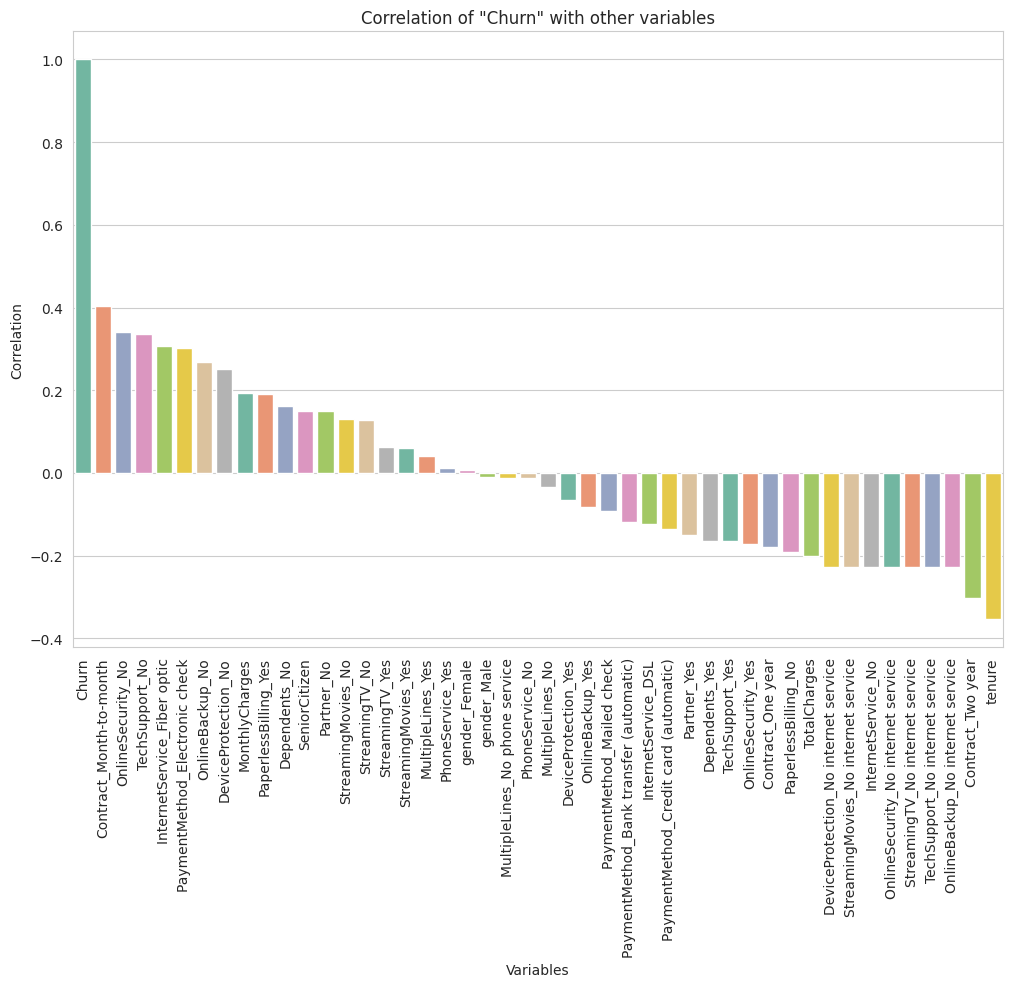

In [ ]:
# Calculate correlation
correlation = df_dummies.corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))

# Plotting
sns.barplot(x=correlation.index, y=correlation.values, palette='Set2')
plt.title('Correlation of "Churn" with other variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


***Data Exploration on :***

***A) Demographics***

***1) Gender Distribution***

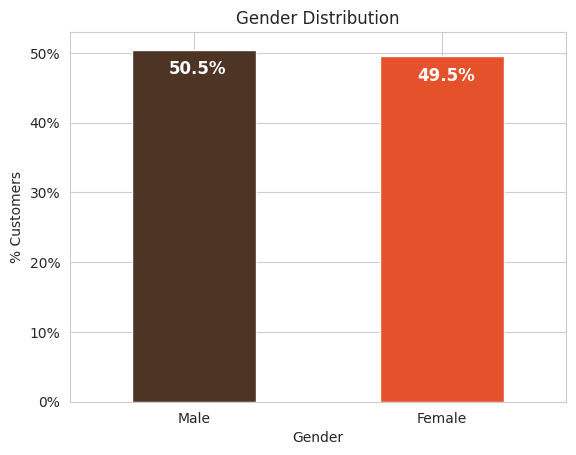

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (telecom_customer_data['gender'].value_counts()*100.0 /len(telecom_customer_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

***% Senior Citizens***

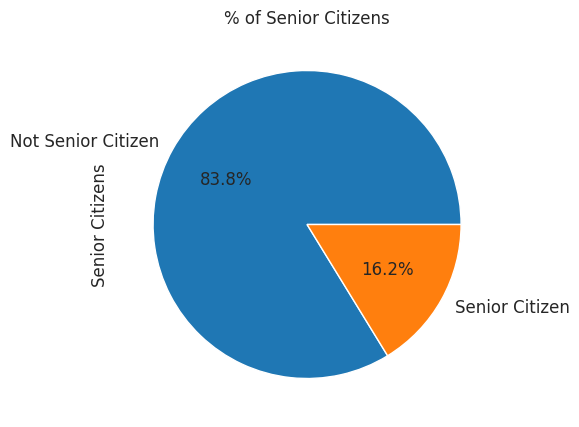

In [ ]:
ax = (telecom_customer_data['SeniorCitizen'].value_counts() * 100.0 / len(telecom_customer_data)).plot.pie(
    autopct='%.1f%%', labels=['Not Senior Citizen', 'Senior Citizen'], figsize=(5, 5), fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

plt.show()

***Partner and dependent status***

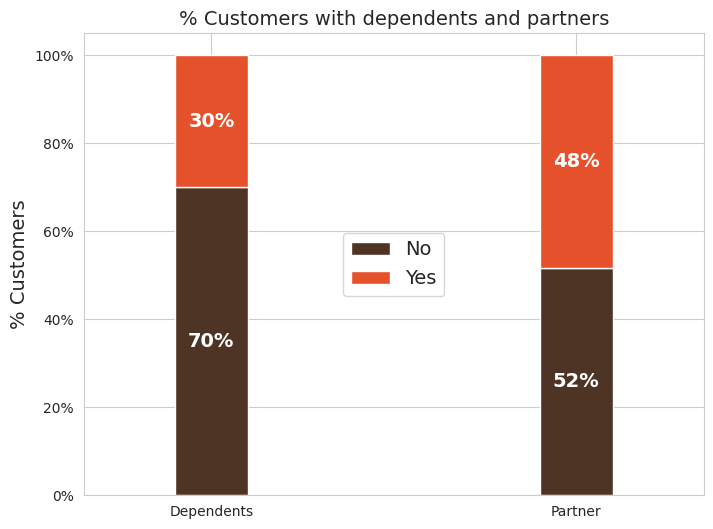

In [ ]:
df2 = pd.melt(telecom_customer_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_customer_data)

colors = ['#4D3425','#E4512B']

ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6), rot=0, width=0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners', size=14)
ax.legend(['No', 'Yes'], loc='center', prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + width / 2, p.get_y() + height / 2),
                color='white', weight='bold', size=14, ha='center', va='center')

plt.show()

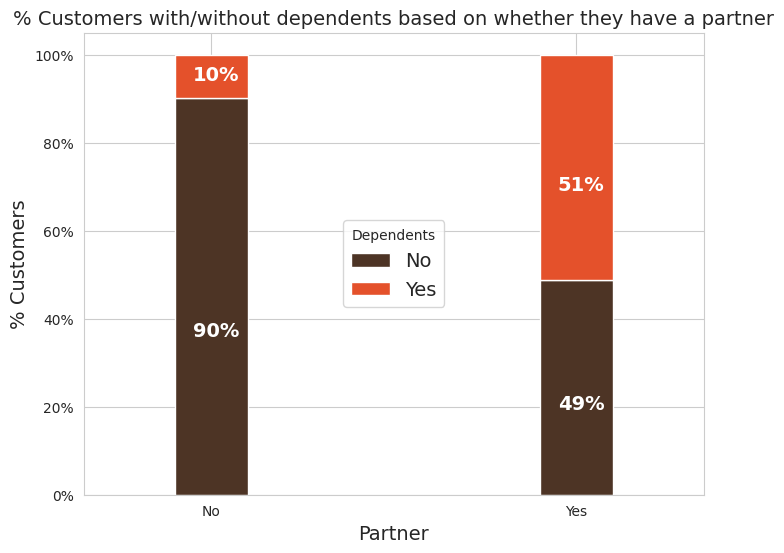

In [ ]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_customer_data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

***B) Customer Account Information***

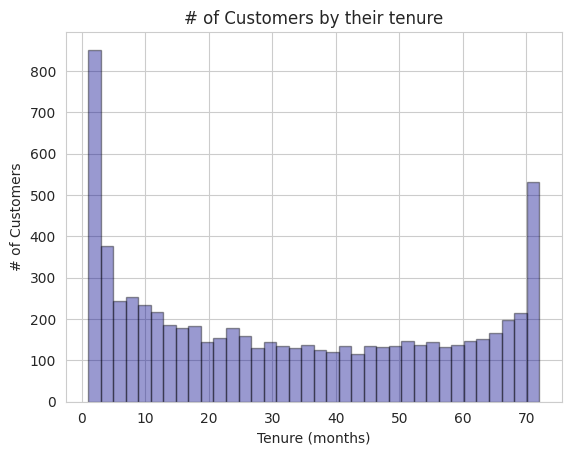

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create the distribution plot
ax = sns.distplot(telecom_customer_data['tenure'], hist=True, kde=False,
                  bins=int(180/5), color='darkblue',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4})

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

plt.show()

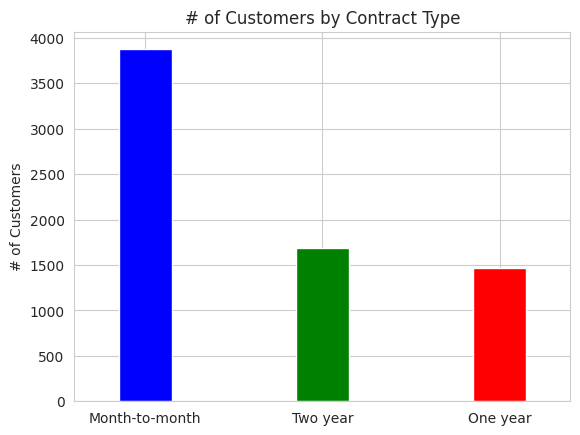

In [ ]:
colors = ['blue', 'green', 'red']


ax = telecom_customer_data['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3, color=colors)

ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

plt.show()

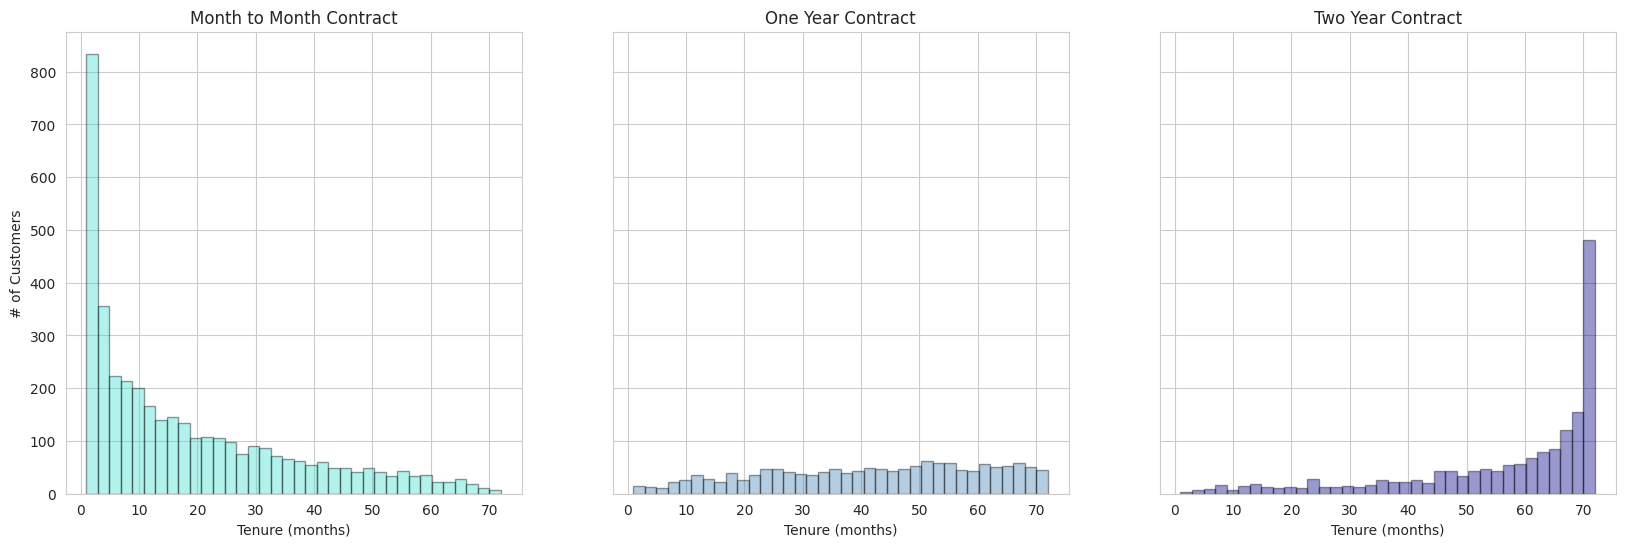

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='turquoise',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract'] == 'One year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='steelblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color='darkblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

plt.show()

***Let us now look at the distribution of various services used by customers***

In [ ]:
telecom_customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

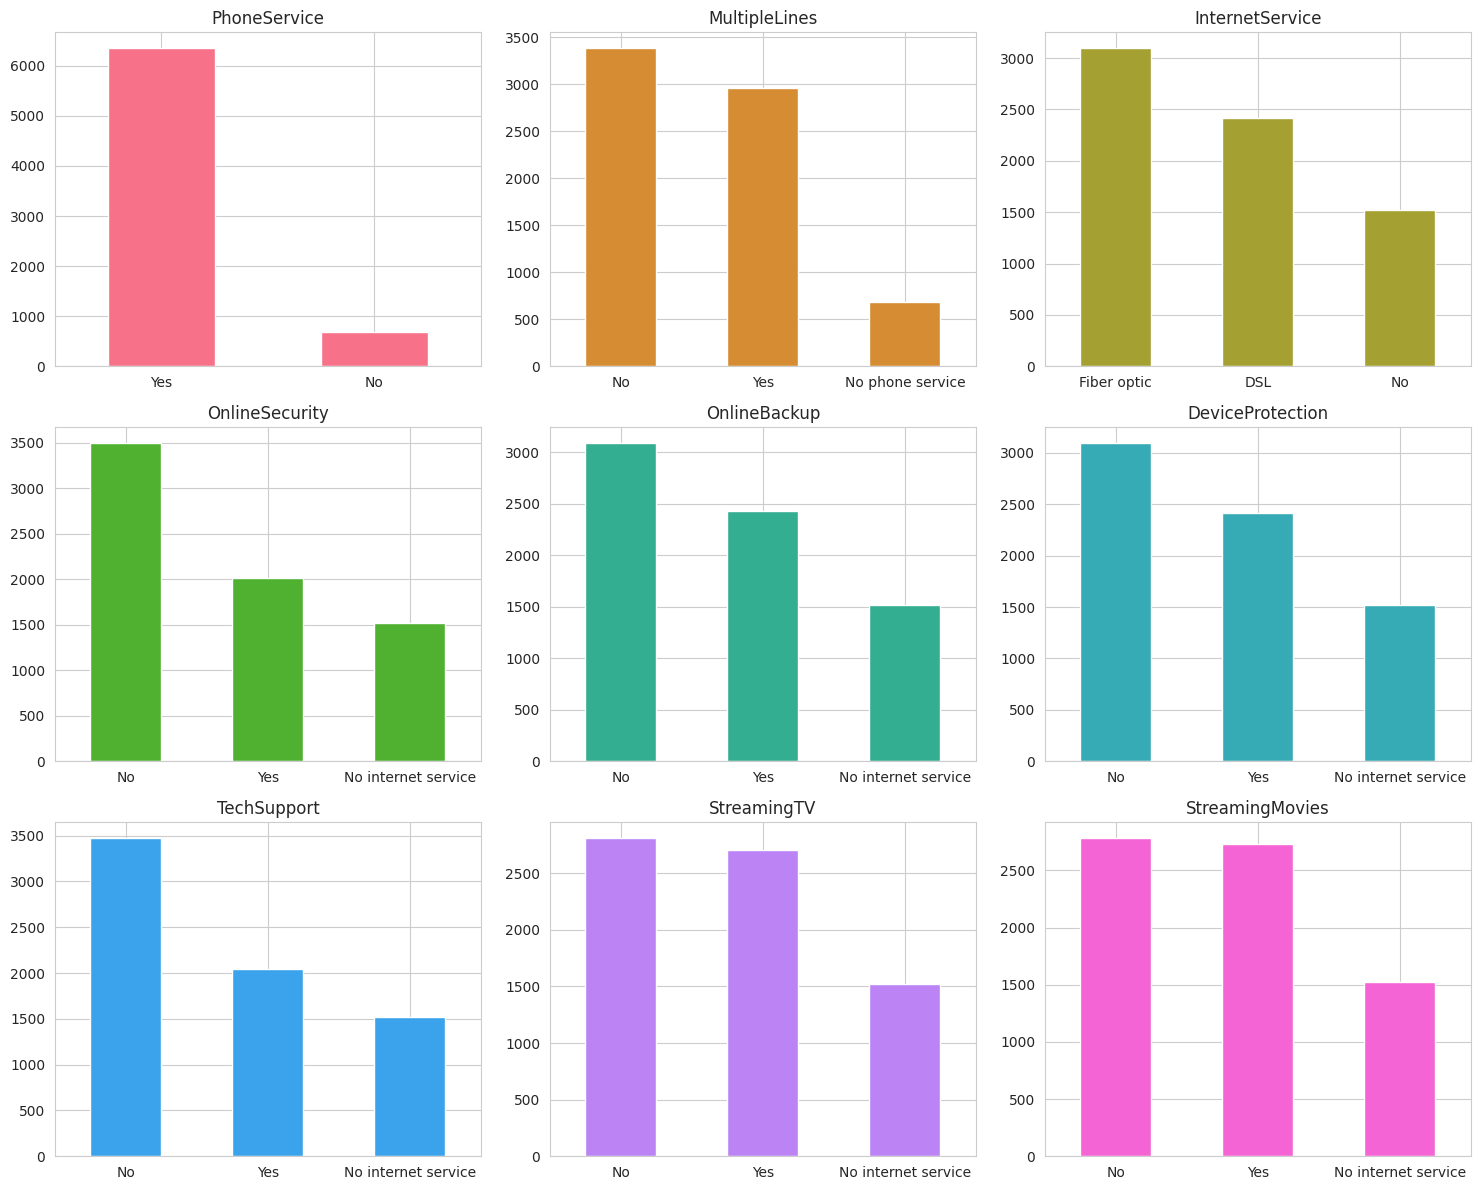

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define a color palette
colors = sns.color_palette("husl", len(services))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, item in enumerate(services):
    row_index = i // 3
    col_index = i % 3
    ax = telecom_customer_data[item].value_counts().plot(kind='bar', ax=axes[row_index, col_index], rot=0, color=colors[i])
    ax.set_title(item)

plt.tight_layout()
plt.show()


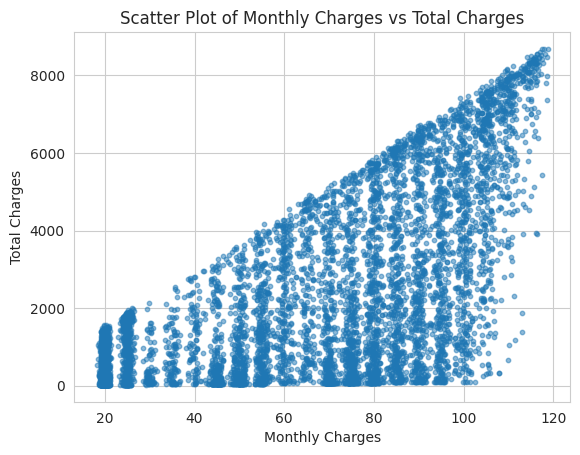

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=telecom_customer_data['MonthlyCharges'], y=telecom_customer_data['TotalCharges'], s=10, alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Monthly Charges vs Total Charges')
plt.grid(True)
plt.show()


***Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot***

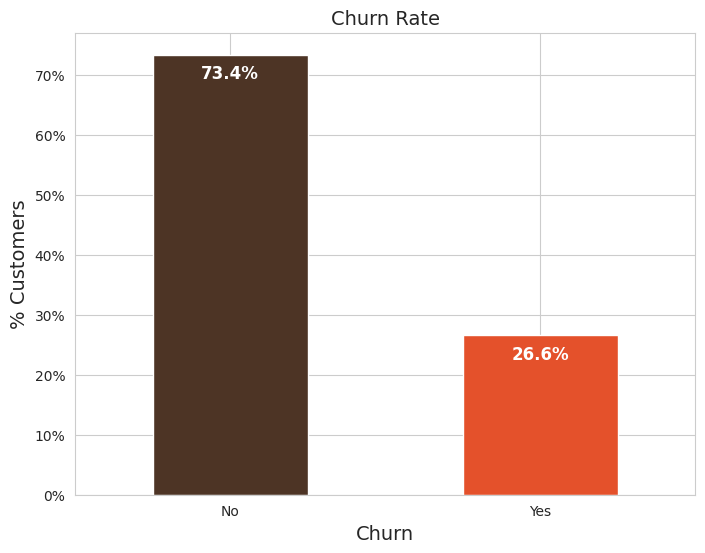

In [ ]:
colors = ['#4D3425', '#E4512B']
ax = (telecom_customer_data['Churn'].value_counts() * 100.0 / len(telecom_customer_data)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(8, 6)
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # Get_width() pulls left or right; get_y() pushes up or down
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() - 4.0,
            str(round((i.get_height() / total) * 100, 1)) + '%',
            fontsize=12,
            color='white',
            ha='center',
            weight='bold'
            )

plt.show()


***i) Churn vs Tenure:***

<Axes: xlabel='Churn', ylabel='tenure'>

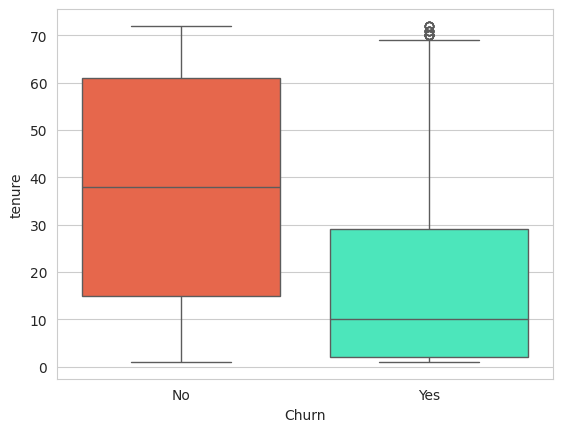

In [ ]:
custom_palette = ["#FF5733", "#33FFC6"]

sns.boxplot(x=telecom_customer_data.Churn, y=telecom_customer_data.tenure, palette=custom_palette)

***ii) Churn by Contract Type:***

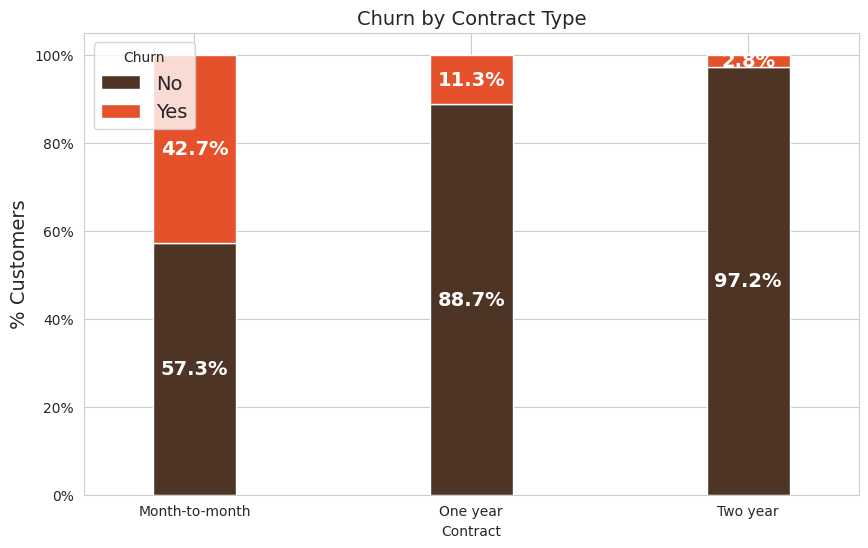

In [ ]:
colors = ['#4D3425', '#E4512B']
contract_churn = telecom_customer_data.groupby(['Contract', 'Churn']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.3,
                                                                stacked=True,
                                                                rot=0,
                                                                figsize=(10, 6),
                                                                color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', weight='bold', size=14)

plt.show()


***iii) Churn by Seniority:***

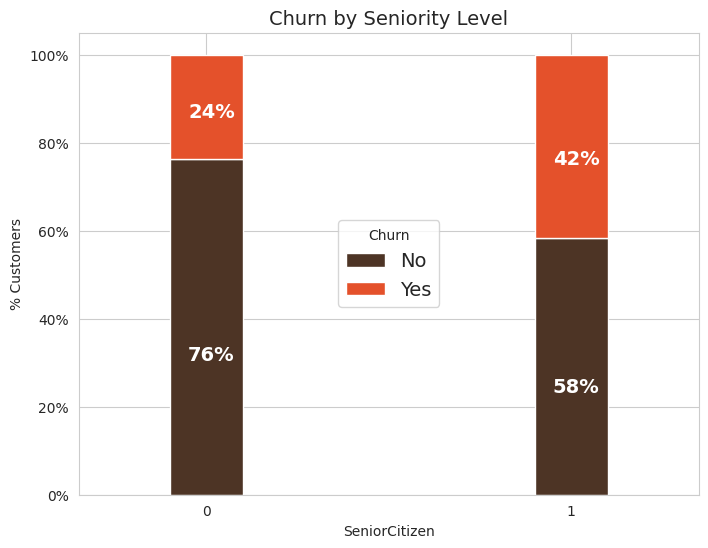

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_customer_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

***iv) Churn by Monthly Charges:***

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

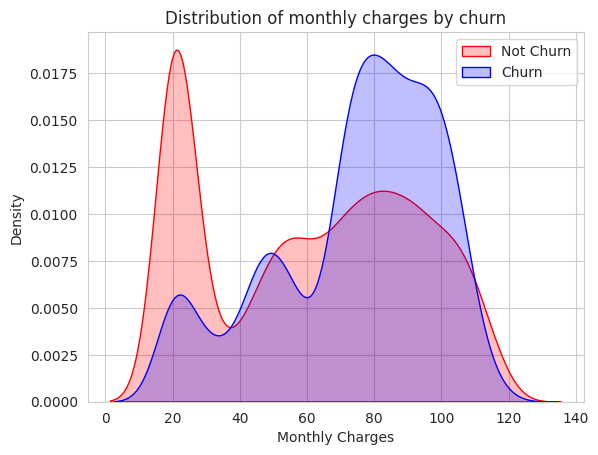

In [ ]:
ax = sns.kdeplot(telecom_customer_data.MonthlyCharges[(telecom_customer_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_customer_data.MonthlyCharges[(telecom_customer_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

***v) Churn by Total Charges:***

Text(0.5, 1.0, 'Distribution of total charges by churn')

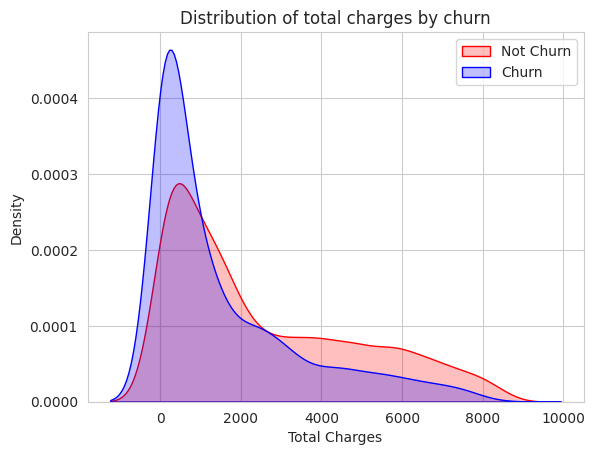

In [ ]:
ax = sns.kdeplot(telecom_customer_data.TotalCharges[(telecom_customer_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_customer_data.TotalCharges[(telecom_customer_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

***Model Building***

***Feature Selecting***

In [ ]:
X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn'].values

***Dataset Splitting***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , stratify = y)

***Feature Scaling***

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Model Training***

***Logistic Regression***

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

***Model Evaluation***

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression :", accuracy)

Accuracy of Logistic Regression : 0.8061611374407583


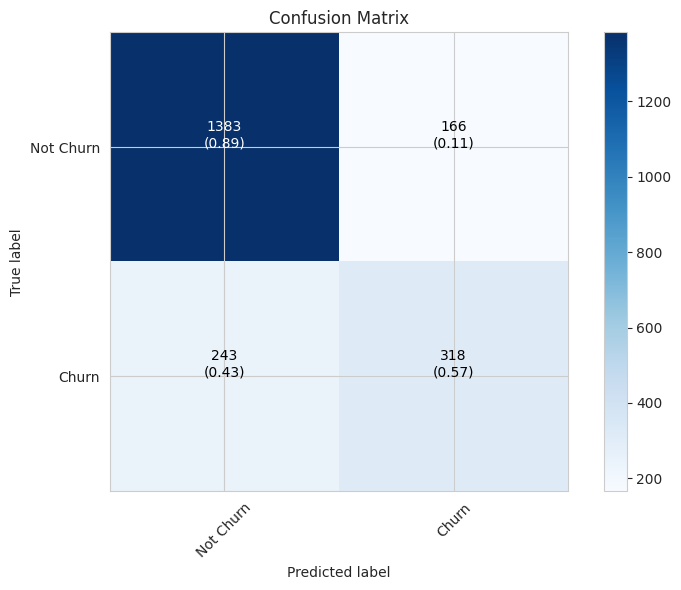

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks and axis labels
classes = ['Not Churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Use white text if cells are dark; otherwise, black
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd') + '\n({:.2f})'.format(conf_matrix_norm[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
lr_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(lr_class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



Axes(0.125,0.11;0.775x0.77)


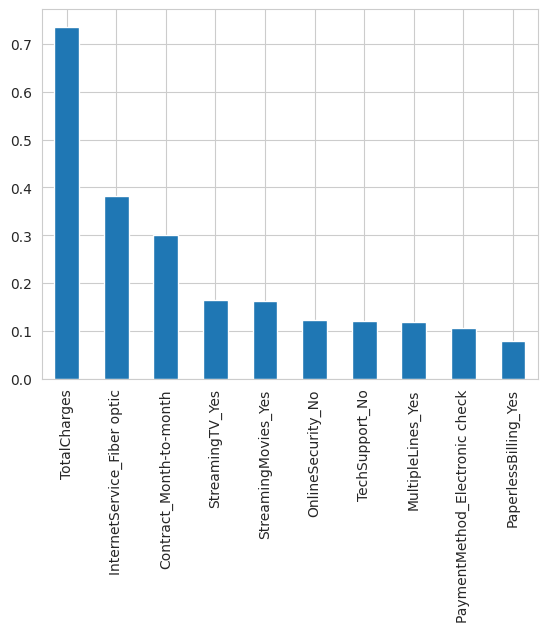

In [ ]:
weights = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


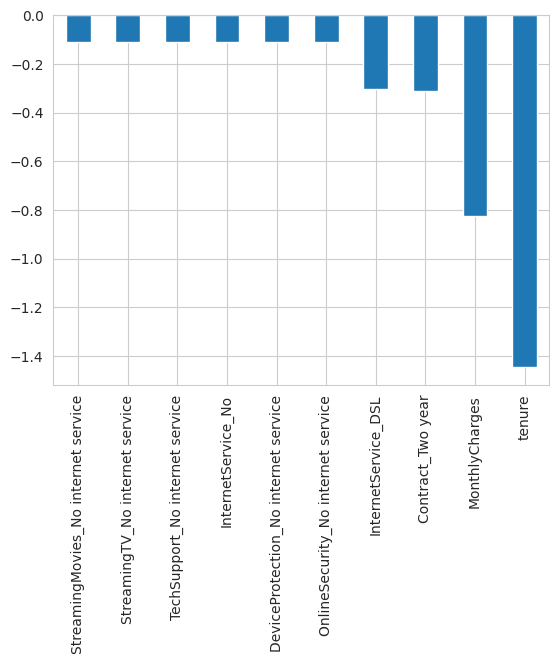

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

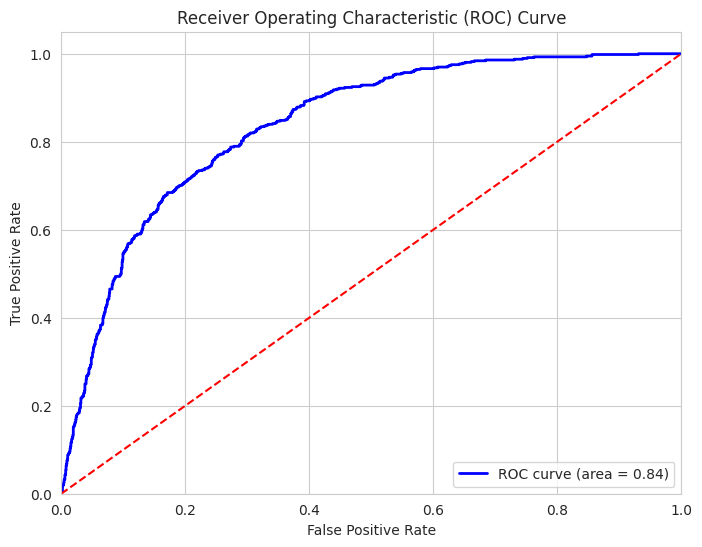

In [ ]:
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

***Support Vecor Machine (SVM)***

In [ ]:
svm_model = SVC(kernel='linear' , C=1)
svm_model.fit(X_train_scaled,y_train)

SVC(C=1, kernel='linear')

In [ ]:
svm_y_pred = svm_model.predict(X_test_scaled)
svm_y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test,svm_y_pred)
print("Accuracy of Support Vector Machine :", accuracy)

Accuracy of Support Vector Machine : 0.7985781990521327


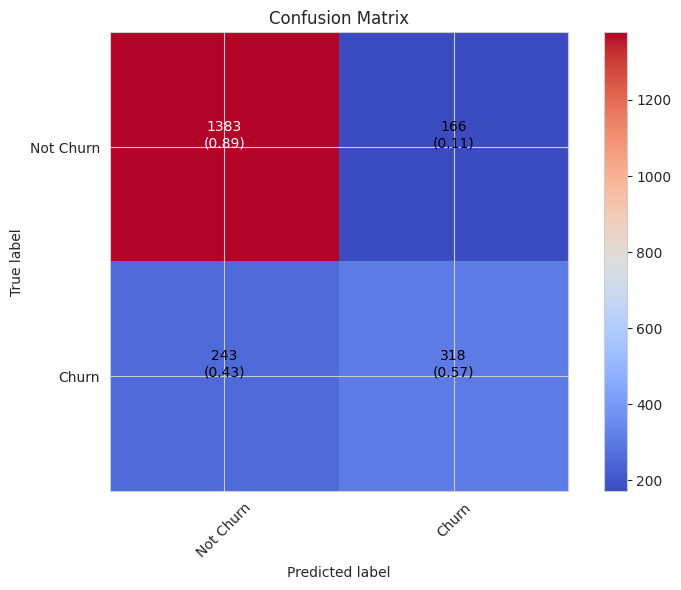

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, svm_y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks and axis labels
classes = ['Not Churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Use white text if cells are dark; otherwise, black
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd') + '\n({:.2f})'.format(conf_matrix_norm[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
svm_class_report = classification_report(y_test, svm_y_pred)
print("\nClassification Report:\n")
print(svm_class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



***Predictive Model: Logistic Regression***

In [ ]:
random_index = np.random.choice(X_test.shape[0], size=1, replace=False)[0]

input_data =  X_test.iloc[[random_index]]

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

input_data_reshaped_scaled = scaler.transform(input_data_reshaped)

predictions = lr_model.predict(input_data_reshaped_scaled)
print(predictions)
print("\nPredictions:")

for prediction in predictions:
    if prediction == 1:
        print("\nCustomer Will Churn!")
    else:
        print("\nCustomer Will Not Churn!")


[0]

Predictions:

Customer Will Not Churn!
